Importing Necessary Modules


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Importing data

In [3]:
train_data = pd.read_csv("C:\\Users\\mjjyo\\OneDrive\\Desktop\\birdclef-2023\\train_metadata.csv")

Cleaning data

In [3]:
train_data.dropna()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['song'],4.3906,38.2788,Turdus tephronotus,African Bare-eyed Thrush,Rolf A. de By,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/128013,abethr1/XC128013.ogg
1,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
2,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363502,abethr1/XC363502.ogg
3,abethr1,[],['song'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/363503,abethr1/XC363503.ogg
4,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg
...,...,...,...,...,...,...,...,...,...,...,...,...
16936,yewgre1,[],[''],-1.2502,29.7971,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://xeno-canto.org/703472,yewgre1/XC703472.ogg
16937,yewgre1,[],[''],-1.2489,29.7923,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/703485,yewgre1/XC703485.ogg
16938,yewgre1,[],[''],-1.2433,29.7844,Eurillas latirostris,Yellow-whiskered Greenbul,András Schmidt,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/704433,yewgre1/XC704433.ogg
16939,yewgre1,[],[''],0.0452,36.3699,Eurillas latirostris,Yellow-whiskered Greenbul,Lars Lachmann,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://xeno-canto.org/752974,yewgre1/XC752974.ogg


Making y the results to train off of (names of birds)

In [4]:

y = train_data['common_name'].dropna().tolist()


Creating X list

In [5]:
X = []

Creting function to get features from each audio recording of a bird, then return the array of features for ML training

In [6]:
#audio files, get the path from the filename column
audio_input = train_data['filename'].dropna()

#function to get features
def get_audio_information(audio_files, result_list):
    
    for i, j in audio_files.iteritems():
        #Take the given file in filename column and split by /
        adjusted = j.split("/")
        #change file to a readable format
        file = "C:\\Users\\mjjyo\\OneDrive\\Desktop\\birdclef-2023\\train_audio\\" + adjusted[0] + "\\" + adjusted[1]
        
        #preparing librosa analysis
        y_, sr = librosa.load(file)
        #getting numerous features
        mfccs = librosa.feature.mfcc(y=y_, sr=sr, n_mfcc=20)
        chroma = librosa.feature.chroma_stft(y=y_, sr=sr)
        mel_spec = librosa.feature.melspectrogram(y=y_, sr=sr, n_mels=128)
        contrast = librosa.feature.spectral_contrast(y=y_, sr=sr)
        tonnetz = librosa.feature.tonnetz(y=y_, sr=sr)
        #concatenating the features into a np array
        features = np.concatenate([mfccs.mean(axis=1), 
                                    mel_spec.mean(axis=1), 
                                    chroma.mean(axis=1),
                                    contrast.mean(axis=1),
                                    tonnetz.mean(axis=1)
                                  ])

        #flattening features
        features = features.flatten()
        
        #adding to final list
        result_list.append(features)

    return result_list

# X = get_audio_information(audio_input, X)
#above was done, but saved in folder

# np.savetxt("C:\\Users\\mjjyo\\OneDrive\\Desktop\\birdclef-2023\\saved_X.csv", X, delimiter=',')

#above was done


Loading data that was created from the previous function (Initial function took a few hours to run)

In [7]:
X = np.loadtxt("C:\\Users\\mjjyo\\OneDrive\\Desktop\\birdclef-2023\\saved_X.csv", delimiter=',')

In [8]:
X = np.array(X)
y = np.array(y)

Making sure lengths are the same

In [9]:
print(len(y), len(X))

16941 16941


Making Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Splitting into train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=100)


Creating Random Forest Classifier

In [12]:
rfc = RandomForestClassifier(n_estimators=1500, random_state=100)


Finding the best params for this random forest classifier using GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'max_features': ['sqrt', 'log2']
}

In [15]:
grid_search = GridSearchCV(rfc, param_grid=param_grid)

In [17]:
def get_best_params(grid):
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    return best_params
    
# best_params = get_best_params(grid_search)
#above was done, result is typed out below, saved for
#running time reasons if I need to re-run program
#Plan to eventually re-do best_params, but for now,
#un necessary

In [26]:
#This was calculated way earlier, like I said, might redo soon
best_params = {'max_depth': None,
              'max_features': 'sqrt',
              'n_estimators': 500}

Using these best parameters to make an accurate Random Forest Classifier

In [27]:
rf_clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               max_features=best_params['max_features'],
                               random_state=42)

In [28]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_features='sqrt', n_estimators=500, random_state=42)

In [29]:
y_pred = rf_clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy after Hyperparameter Tuning:", acc)

Accuracy after Hyperparameter Tuning: 0.3384479197403364


Initial accuracy very low. After some exploratory data analysis you can see the following: Certain types of birds have a lot of examples while a few have very few.

<BarContainer object of 264 artists>

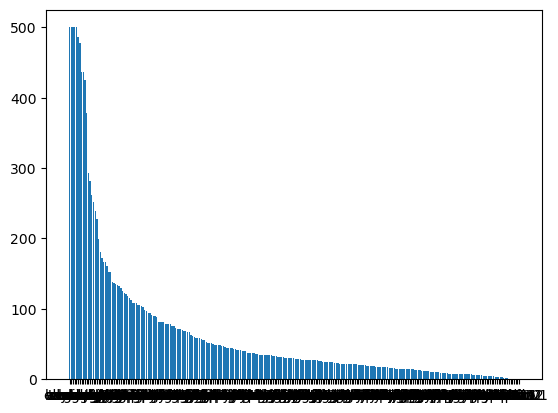

In [4]:
type_of_bird_count = train_data['primary_label'].value_counts()
plt.bar(type_of_bird_count.index, type_of_bird_count.values)

# Accuracy is low, change sampling to help with accuracy. Using Random Over Sampler.

In [32]:
from imblearn.over_sampling import RandomOverSampler

In [33]:
ros = RandomOverSampler(random_state=42)

In [34]:
# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

In [35]:
# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [36]:
# Train random forest classifier on resampled data
resampled_rfc = RandomForestClassifier(n_estimators=500, random_state=42)
resampled_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [37]:
# Test the classifier on the test set
accuracy = resampled_rfc.score(X_test, y_test)
print("Accuracy on test set: {:.2f}%".format(accuracy * 100))

Accuracy on test set: 97.08%


In [38]:
new_y_pred = resampled_rfc.predict(X_test)

In [39]:
new_y_pred

array(['Buff-bellied Warbler', 'Woodland Kingfisher',
       'Brown Woodland-Warbler', ..., 'Cinnamon Bracken-Warbler',
       'Streaky Seedeater', 'Yellow-bellied Greenbul'], dtype='<U32')

Finding out how many were misclassified in relation to y_test. Accuracy score already exists, but seeing the numbers is interesting

In [40]:
import numpy as np

In [41]:
# Find indices of misclassified samples
misclassified = np.where(y_test != new_y_pred)[0]

In [48]:
#num wrong
print(len(misclassified))

1158


In [49]:
#total num
print(len(y_test))

39600


Model works, so I am saving it to my folder so I can use it in a different file for the identification in the longer audio clip

In [59]:
ML_save_path = "C:\\Users\\mjjyo\\OneDrive\\Desktop\\birdclef-2023\\bird_model.pk1"

In [60]:
import joblib


In [61]:
joblib.dump(resampled_rfc, ML_save_path)  

['C:\\Users\\mjjyo\\OneDrive\\Desktop\\birdclef-2023\\bird_model.pk1']